# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [32]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


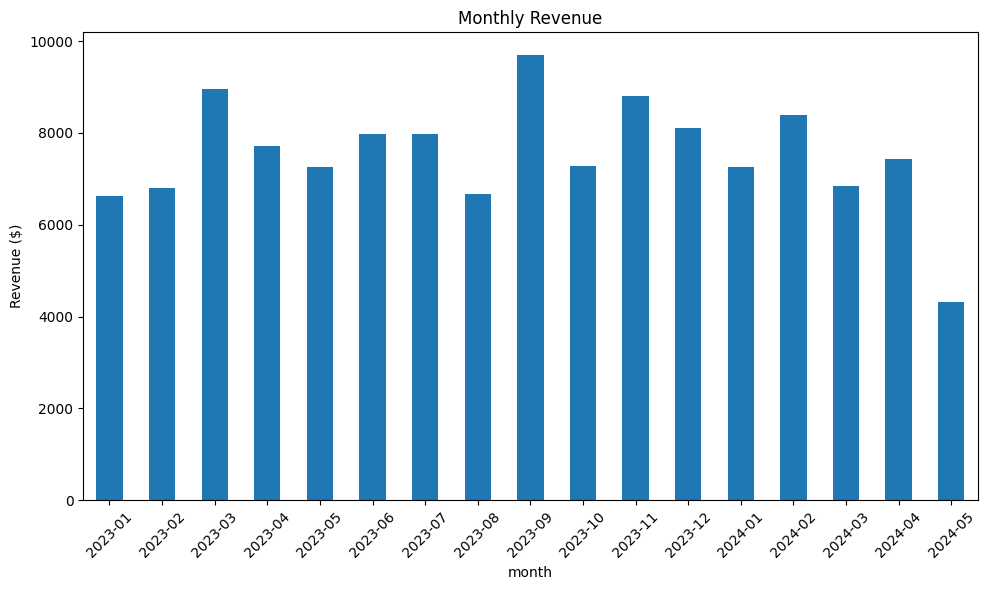

In [33]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [34]:
# Your code here
df["revenue"] = df["quantity"] * df["unit_price"]
df["order_date"] = pd.to_datetime(df["order_date"])
df["quarter"] = df["order_date"].dt.to_period("Q")
df["month"] = df["order_date"].dt.to_period("M")
last_quarter = df["quarter"].max()

last_quarter_data = df[df["quarter"] == last_quarter]
monthly_revenue = last_quarter_data.groupby("month")["revenue"].sum()

print(f"Total revenue in {last_quarter}: ${last_quarter_data['revenue'].sum():,.2f}")
print("\nMonthly breakdown:")
print(monthly_revenue)


Total revenue in 2024Q2: $11,745.00

Monthly breakdown:
month
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [35]:
# Your code here
top_customers = df.groupby("customer_id")["revenue"].sum().nlargest(5)

print("Top 5 Customers by Total Revenue:")
print(top_customers)

Top 5 Customers by Total Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [39]:
# Your code here
avg_spend = df.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)

print("Average spend per order by customer segment:")
print(avg_spend)
print("Seniros spend the most on average per order.")

Average spend per order by customer segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64
Seniros spend the most on average per order.


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [ ]:
# Your code here
df.groupby("region").agg(total_rev=("revenue", "sum"), avg_order=("revenue", "mean"))
print("The East region has the highest total revenue, while the South region has the highest average order value.")


,total_rev,avg_order
region,,
East,31221.80,240.167692
North,34351.69,258.283383
South,34839.45,274.326378
West,27727.73,252.070273


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [40]:
# Your code here
category_perf = (
    df.groupby("product_category")[["quantity", "revenue"]]
      .sum()
      .sort_values("revenue", ascending=False)
)

print("Product Category Performance:")
print(category_perf)
print("Home products have the highest revenue and quantity sold.")

Product Category Performance:
                  quantity   revenue
product_category                    
Home                   269  29871.47
Electronics            239  25498.31
Clothing               253  24804.57
Books                  227  24046.06
Sports                 246  23920.26
Home products have the highest revenue and quantity sold.


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [25]:
# Your code here
discounted_orders = data[data["discount_applied"] > 0]
nondiscounted_orders = data[data["discount_applied"] == 0]
avg_revenue_discounted = discounted_orders["revenue"].mean()
avg_revenue_nondiscounted = nondiscounted_orders["revenue"].mean()
print(f"Average Revenue (Discounted Orders): ${avg_revenue_discounted:.2f}")
print(f"Average Revenue (Non-Discounted Orders): ${avg_revenue_nondiscounted:.2f}")

# Compare difference
if avg_revenue_discounted > avg_revenue_nondiscounted:
    print("\nDiscounted orders generate *higher* revenue per order.")
else:
    print("\nDiscounted orders generate *lower* revenue per order.")



Average Revenue (Discounted Orders): $263.83
Average Revenue (Non-Discounted Orders): $248.30

Discounted orders generate *higher* revenue per order.


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [28]:
# Your code here
payment_percent = (df["payment_method"].value_counts(normalize=True) * 100).round(2)
payment_avg_revenue = df.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)

print("Percentage of orders by payment method:")
print(payment_percent)
print("\nAverage revenue per order by payment method:")
print(payment_avg_revenue)

Percentage of orders by payment method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average revenue per order by payment method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

In [41]:
# Your code here
df["order_date"] = pd.to_datetime(df["order_date"])
df["day_of_week"] = df["order_date"].dt.day_name()

revenue_by_day = df.groupby("day_of_week")["revenue"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

print("Revenue by Day of Week:")
print(revenue_by_day)
print("weekdays and weekends have similar revenues.")


Revenue by Day of Week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64
weekdays and weekends have similar revenues.


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [42]:
# Your code here

data["profit"] = data["revenue"] * 0.20

total_profit = data["profit"].sum()

profit_by_region = data.groupby("region")["profit"].sum().sort_values(ascending=False)
most_profitable_region = profit_by_region.idxmax()

print(f"Total Profit: ${total_profit:,.2f}")
print("\nProfit by Region:")
print(profit_by_region)
print(f"\nMost Profitable Region: {most_profitable_region}")


Total Profit: $25,628.13

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64

Most Profitable Region: South


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

In [43]:
# The business should focus its marketing and sales efforts on professional and senior customer segments in the south and north regions

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.